In [1]:
from PIL import Image
import numpy as np
import pandas as pd
from glob import glob
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def make_training_set(max_file):
    training_set = []
    labels = []
    for n in range(1,max_file):
        training_set.append("training_data/{}/data ({}).json".format(target_feature, str(n)))
        
    return training_set, label


In [3]:
def json_to_df(filename, canvas_height, canvas_width, color):
    ## Load in the file
    with open(filename) as f:
        data = json.load(f)
    training_route = data[color]
    
    ## Create and fill location matrix
    paths = pd.DataFrame(0, index=range(0,canvas_height),columns=range(0,canvas_width))
    for step in training_route:
        paths.set_value(np.round(step['y']), np.round(step['x']), 1)
        paths.set_value(np.round(step['y']) + 1, np.round(step['x']) + 1, 1)
        paths.set_value(np.round(step['y']) + 1, np.round(step['x']), 1)
        paths.set_value(np.round(step['y']) + 1, np.round(step['x']) - 1, 1)
        paths.set_value(np.round(step['y']), np.round(step['x']) + 1, 1)
        paths.set_value(np.round(step['y']), np.round(step['x']) - 1, 1)
        paths.set_value(np.round(step['y']) - 1, np.round(step['x']), 1)
        paths.set_value(np.round(step['y']) - 1, np.round(step['x']) - 1, 1)
        paths.set_value(np.round(step['y']) - 1, np.round(step['x']) + 1, 1)
        
    return paths

def center_df(df, canvas_height, canvas_width):
    ## Positions the receiver at the bottom center of the field
    ## This corresponds to the largest y-value
    
    bottom_of_route = 0
    for index, row in df.iterrows():
        if sum(row) > 0:
            bottom_of_route = index
            #print(bottom_of_route)
    
    
    
    for i,x in enumerate(df.ix[bottom_of_route]):
        if x != 0:
            lateral_translation = i
            
    df2 = pd.DataFrame(0, index=range(0,canvas_height),columns=range(0,canvas_width))
    df2.columns = [x for x in range(canvas_width,canvas_width*2)]
    df3 = df.join(df2)
    df3 = df3.shift(canvas_height-bottom_of_route, axis = 0).fillna(0)
    df3 = df3.shift(canvas_width-lateral_translation, axis = 1).fillna(0)
    
    return df3

In [95]:
def process_data(first_sample, last_sample, reverse):
    canvas_height = 400
    canvas_width = 600
    X = []
    Y = []
    for directory in glob('/Users/gstarek/Desktop/playbook/training_data/*'):
        playtype = directory.split("/")[-1]
        for n in range(first_sample, last_sample):
            fn = f'/Users/gstarek/Desktop/playbook/training_data/{playtype}/data ({n}).json'
            print(fn)
            df = json_to_df(fn, canvas_height, canvas_width, 'red')
            
            try:
                df = center_df(df, canvas_height, canvas_width)
                df.to_csv(f'/Users/gstarek/Desktop/playbook/training_data/{playtype}/right_{n}.csv')
                x = np.reshape(df.as_matrix(),canvas_height*canvas_width*2)
                X.append(x)
                Y.append(f"{playtype}_right")
                cols = df.columns
                if reverse == 'yes':
                    ## Create a mirror image DataFrame to run the play the other way
                    df = df[df.columns[::-1]]
                    df.columns = cols
                    df.to_csv(f'/Users/gstarek/Desktop/playbook/training_data/{playtype}/left_{n}.csv')
                    x = np.reshape(df.as_matrix(),canvas_height*canvas_width*2)
                    X.append(x)
                    ## The DataFrame is already centered and appropriately sized
                    #df = center_df(df, canvas_height, canvas_width)
                    #x = np.reshape(df.as_matrix(),canvas_height*canvas_width*2)
                    #X.append(x)
                    Y.append(f"{playtype}_left")
            except:
                print("Error")
                continue
    return X, Y

In [96]:
X, Y = process_data(1,80,reverse = 'yes')

/Users/gstarek/Desktop/playbook/training_data/posts/data (1).json


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value i

/Users/gstarek/Desktop/playbook/training_data/posts/data (2).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (3).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (4).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (5).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (6).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (7).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (8).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (9).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (10).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (11).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (12).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (13).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (14).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (15).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (16).json
/Us

In [97]:
#test_x, test_y = process_data(80,101)
test_x, test_y = process_data(80,101, reverse='yes')

/Users/gstarek/Desktop/playbook/training_data/posts/data (80).json


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value i

/Users/gstarek/Desktop/playbook/training_data/posts/data (81).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (82).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (83).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (84).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (85).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (86).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (87).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (88).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (89).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (90).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (91).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (92).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (93).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (94).json
/Users/gstarek/Desktop/playbook/training_data/posts/data (95).

In [98]:
model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
model.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

In [318]:
preds = model.predict(test_x)
conf_matrix = pd.DataFrame(confusion_matrix(test_y, preds), columns = np.unique([test_y]))
conf_matrix.rename({0: conf_matrix.columns[0], 1: conf_matrix.columns[1], 
                       2: conf_matrix.columns[2], 3: conf_matrix.columns[3],
                       4: conf_matrix.columns[4]})

,benders,fades,hitches,posts,slants
benders,21,0,0,0,0
fades,0,18,0,3,0
hitches,0,1,19,1,0
posts,0,1,0,20,0
slants,0,0,0,0,21


In [99]:
preds = model.predict(test_x)
conf_matrix = pd.DataFrame(confusion_matrix(test_y, preds), columns = np.unique([test_y]))
conf_matrix.rename({0: conf_matrix.columns[0], 1: conf_matrix.columns[1], 
                       2: conf_matrix.columns[2], 3: conf_matrix.columns[3],
                       4: conf_matrix.columns[4], 5: conf_matrix.columns[5],
                       6: conf_matrix.columns[6], 7: conf_matrix.columns[7],
                       8: conf_matrix.columns[8], 9: conf_matrix.columns[9]})

,benders_left,benders_right,fades_left,fades_right,hitches_left,hitches_right,posts_left,posts_right,slants_left,slants_right
benders_left,21,0,0,0,0,0,0,0,0,0
benders_right,0,21,0,0,0,0,0,0,0,0
fades_left,0,0,19,0,0,0,2,0,0,0
fades_right,0,0,0,18,0,0,0,3,0,0
hitches_left,0,0,1,0,19,0,1,0,0,0
hitches_right,0,0,0,0,0,20,0,1,0,0
posts_left,0,0,2,0,0,0,19,0,0,0
posts_right,0,0,0,2,0,0,0,19,0,0
slants_left,0,0,0,0,0,0,0,0,21,0
slants_right,0,0,0,0,0,0,0,0,0,21


In [100]:
predict_play("/Users/gstarek/Downloads/data (1).json")

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value i

blue ['hitches_right']
Error
Error
Error
yellow ['benders_right']


In [57]:
def predict_play(json_file):
    canvas_height = 400
    canvas_width = 600
    for color in ['blue', 'orange', 'green', 'purple', 'yellow']:
        df = json_to_df(json_file, canvas_height, canvas_width, color)
        try:
            df = center_df(df, canvas_height, canvas_width)
            x = np.reshape(df.as_matrix(),canvas_height*canvas_width*2)
        except:
            print("Error")
            continue
        print(color, model.predict([x]))


In [103]:
def plot_play(play):
    play = play.reindex(index=play.index[::-1])
    plt.imshow(play)

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline

In [108]:
def plot_play(json_file, color):
    canvas_height = 400
    canvas_width = 600
    #for color in ['blue', 'orange', 'green', 'purple', 'yellow']:
    df = json_to_df(json_file, canvas_height, canvas_width, color)
    try:
        df = center_df(df, canvas_height, canvas_width)
        x = np.reshape(df.as_matrix(),canvas_height*canvas_width*2)
    except:
        print("Error")
    plt.imshow(df)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value i

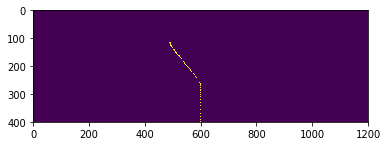

In [113]:
plot_play("/Users/gstarek/Downloads/data (3).json", 'yellow')


In [102]:
predict_play("/Users/gstarek/Downloads/data (3).json")


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value i

blue ['hitches_left']
orange ['slants_right']
green ['fades_right']
purple ['hitches_right']
yellow ['posts_right']


In [67]:
for index, row in df.iterrows():
    if sum(row) > 1:
        print(index)

284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
305
306
307
311
312
313
317
318
319
324
325
326
335
336
337
343
344
345
350
351
352
360
361
362
375
376
377
383
384
385
390
391
392
394
395
396
397
398
399


In [71]:
row[-1::]

1199    0.0
Name: 399, dtype: float64

In [81]:
for index, row in df[-1::].iterrows():
    if sum(row) > 0:
        print(index, sum(row))

399 3.0


In [83]:
for index, row in df[::-1].iterrows():
    if sum(row) > 0:
        print(index, sum(row))

399 3.0
398 3.0
397 3.0
396 3.0
395 3.0
394 3.0
392 3.0
391 3.0
390 3.0
385 3.0
384 3.0
383 3.0
377 3.0
376 3.0
375 3.0
362 3.0
361 3.0
360 3.0
352 3.0
351 3.0
350 3.0
345 3.0
344 3.0
343 3.0
337 3.0
336 3.0
335 3.0
326 3.0
325 3.0
324 3.0
319 3.0
318 3.0
317 3.0
313 3.0
312 3.0
311 3.0
307 3.0
306 3.0
305 3.0
302 3.0
301 3.0
300 3.0
299 6.0
298 6.0
297 6.0
296 6.0
295 8.0
294 8.0
293 7.0
292 7.0
291 7.0
290 5.0
289 5.0
288 5.0
287 3.0
286 3.0
285 3.0
284 3.0


In [88]:
poss = df[::-1].sort_index()

In [87]:
for i,v in enumerate(df.ix[284]):
    if v > 0:
        print(i,v)

596 1.0
597 1.0
598 1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [89]:
for i,v in enumerate(poss.ix[284]):
    if v > 0:
        print(i,v)

596 1.0
597 1.0
598 1.0


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [90]:
for index, row in df.ix[284].iterrows():
    print(index, row)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


AttributeError: 'Series' object has no attribute 'iterrows'

In [ ]:
##Reversing DataFrame isn't working as expected. Need a better mirror image solution.